In [1]:
#import needed packages
import pandas as pd
import os
from pathlib import Path
from collections import Counter
from tqdm import tqdm
tqdm.pandas()
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

In [2]:
#specify directories for parquets and excels containing frequency distributions
pqt_dirs = '.\\parquets'
fdist_dirs = '.\\fdist_xlsx'

In [3]:
#topic identifyers
covid = [
    'deguldenmiddenweg', 
    'derdekamer', 
    'ditishetnieuws', 
    'FVDNL', 
    'Gerrit_Brendel',
    'NieuwsvoorNederlanders',
    'ninefornews'
]

covid_terms = [
    'vaccin',
    'regering',
    'vaccinatie',
    'lockdown'
]

ukraine = [
    'berichten_uit_donbass', 
    'blckbxtv',
    'InfodefenseNED', 
    'Mariba2puntnul', 
    'ministerievanwaarheid',
    'RinusVerhagen',
    'truthned', 
    'wietsenijboer'
]
ukraine_terms = [ 
    'NAVO',
    'ukraine',
    'regering',
    'rusland'
]

mixed = [
    'hetkantelpunt', #Ukraine war, COVID-19
    'Openbaringen', #Politics NL/US/EU 
    'talktomem', #COVID-19, Ukraine war
    'vmGeluid' #Politics NL
]

mixed_terms = [
    'vaccin',
    'overheid',
    'NAVO',
    'ukraine'
    
]


In [4]:
#initialize spacy model
nlp = spacy.load("nl_core_news_sm")

In [10]:
#manually filter stopwords 
stopwords = ['en','die','|','will', 'they','er','have', 'from','and', 'the', 'The', 'are', 'that', 'by', 'a', 'that', 'all', 'Covid', 'covid', 'COVID-19', 'COVID', 'Covid-19', 'I']

In [6]:
def count_words(text):
    words = text.split()
    wordCount = Counter(words)
    return wordCount

In [7]:
def count_total(word_freq_filtered):
    term_count = Counter(word_freq_filtered.items())
    print(f'term_count = {term_count}')
    return term_count
    

In [14]:
#function returning top 100 word collocations associated with topic terms
def colloc(df, terms):
    res_df = pd.DataFrame()
    wf_total_count = Counter()
    
    for term in mixed_terms:
        df_filtered = df[df['message_text'].str.contains(term).copy()]
        print('counting words')
        df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)
        print('summing up')

        
        
        counters = df_filtered['word_count'].dropna()
        total_counts = Counter()
        for counter in tqdm(counters, desc="Summing word counts"):
            total_counts.update(counter)

        word_count_df = pd.DataFrame(total_counts.items(), columns=['word', 'total_count'])
        
        word_count_df = word_count_df.sort_values(by='total_count', ascending=False).reset_index(drop=True)
        word_count_df['term'] = term
        
        res_df = pd.concat([res_df, word_count_df])
        res_df = res_df[res_df.word.isin(DET_LIST)]
        res_df_filtered = res_df[res_df.word.isin(stopwords) == False]
        #remove stopwords

        
        #res_df_copy = res_df.copy()
        #res_df_filtered = [token.]
            

        top100 = res_df_filtered.head(100)
        
        word_freq = dict(zip(top100['word'], top100['total_count']))
        word_freq_filtered = {key:val for key, val in word_freq.items() if val != 1}
        
        wf_total_count.update(word_freq_filtered)

        #generate wordcloud
        print(f'current term = {term}')
        try:
            wc = WordCloud(width=800, 
                           height=400, 
                           background_color='white', 
                           colormap= 'twilight', 
                           prefer_horizontal = 0.9)
            wc.generate_from_frequencies(word_freq)
            plt.figure(figsize=(15, 7.5))
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.show()
        except:
            print(f'no values for {term} {file}')
            continue
            
    
    print('Total combined collocation counts:')
    df_total_count = pd.DataFrame.from_dict(wf_total_count, orient='index', columns=['index'])
    df_total_count_sorted = df_total_count.sort_values(by='index', ascending = False)

    title = f'{file}.xlsx'
    df_total_count_sorted.to_excel(title)
    

    return res_df

            
    


C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


current file = hetkantelpunt
counting words
summing up


Summing word counts: 100%|███████████████████████████████████████████████████████| 350/350 [00:00<00:00, 106338.75it/s]

current term = vaccin


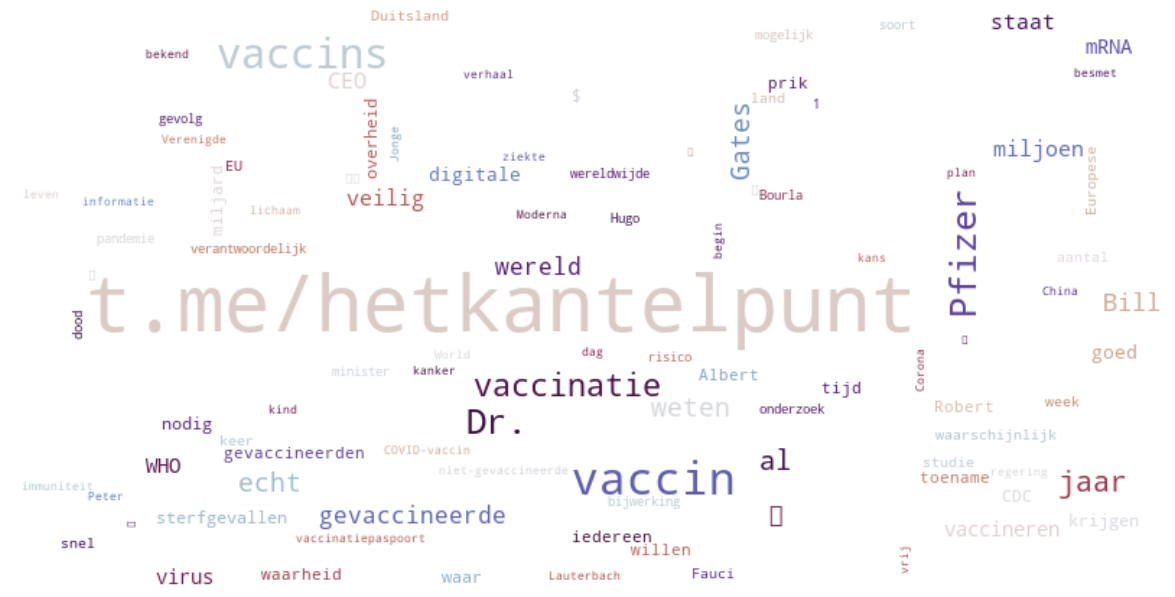

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 130/130 [00:00<00:00, 59415.88it/s]

current term = overheid


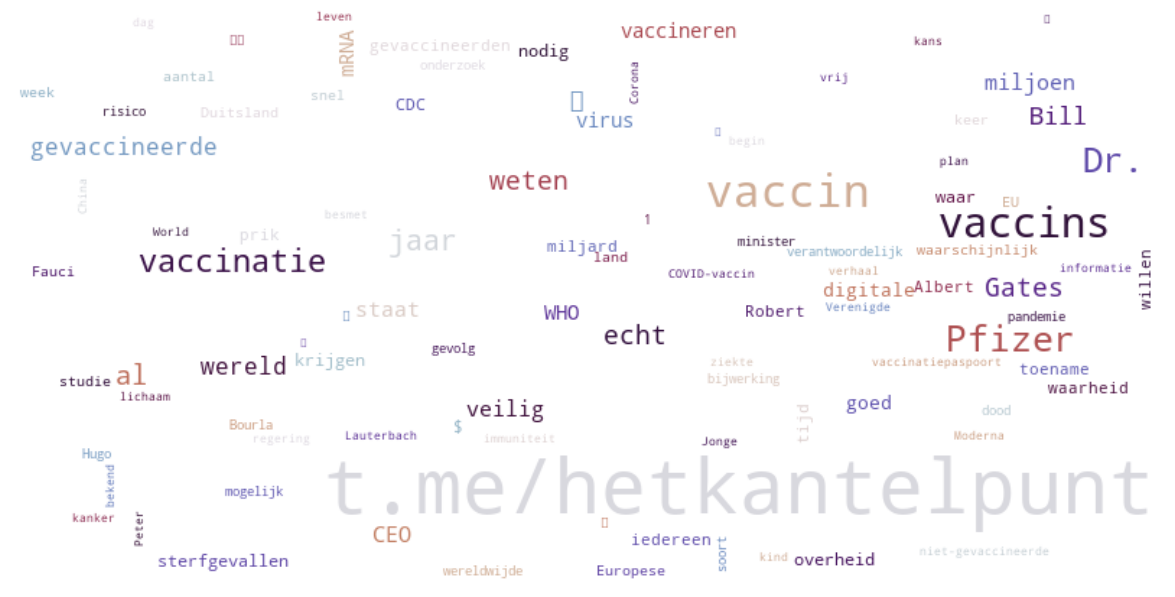

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|██████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 37243.50it/s]

current term = NAVO


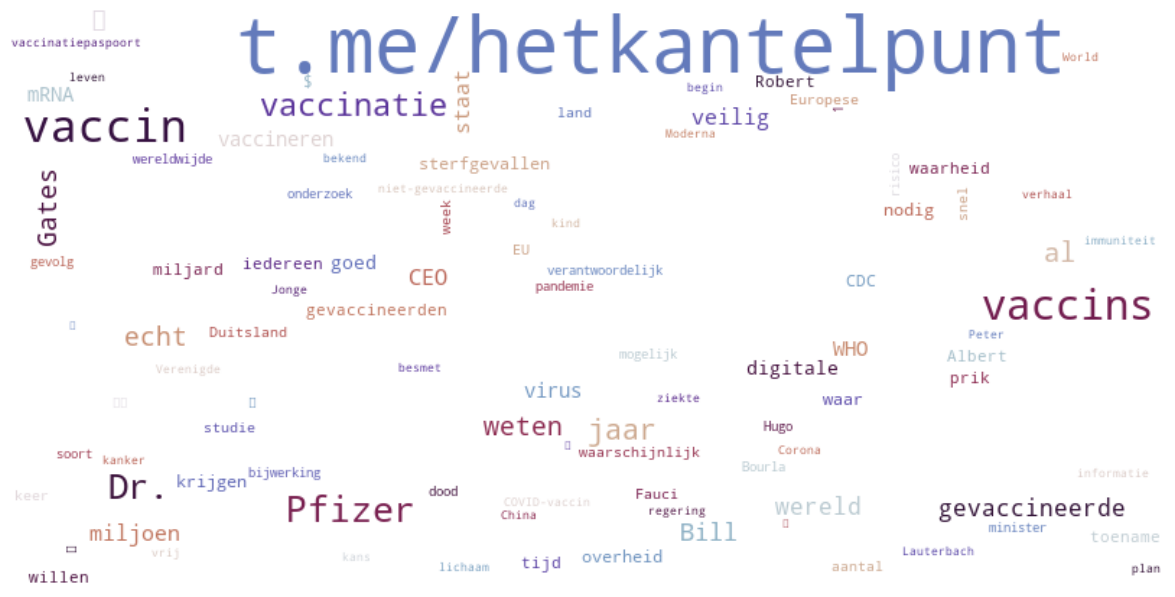

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|███████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]

current term = ukraine


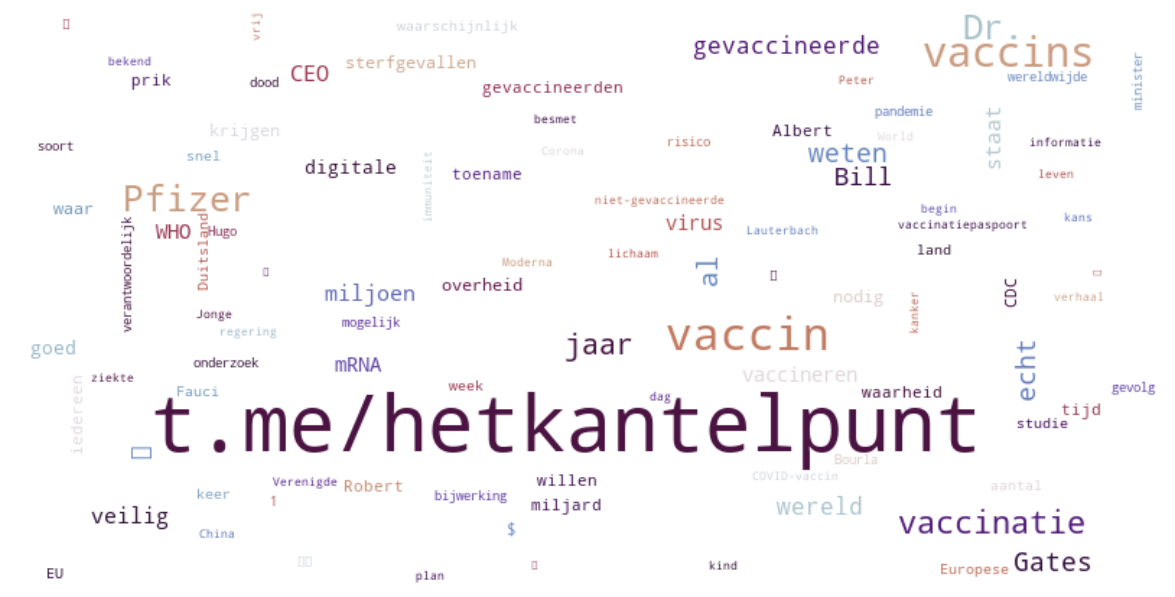

Total combined collocation counts:


C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


current file = Openbaringen
counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 34424.22it/s]

current term = vaccin


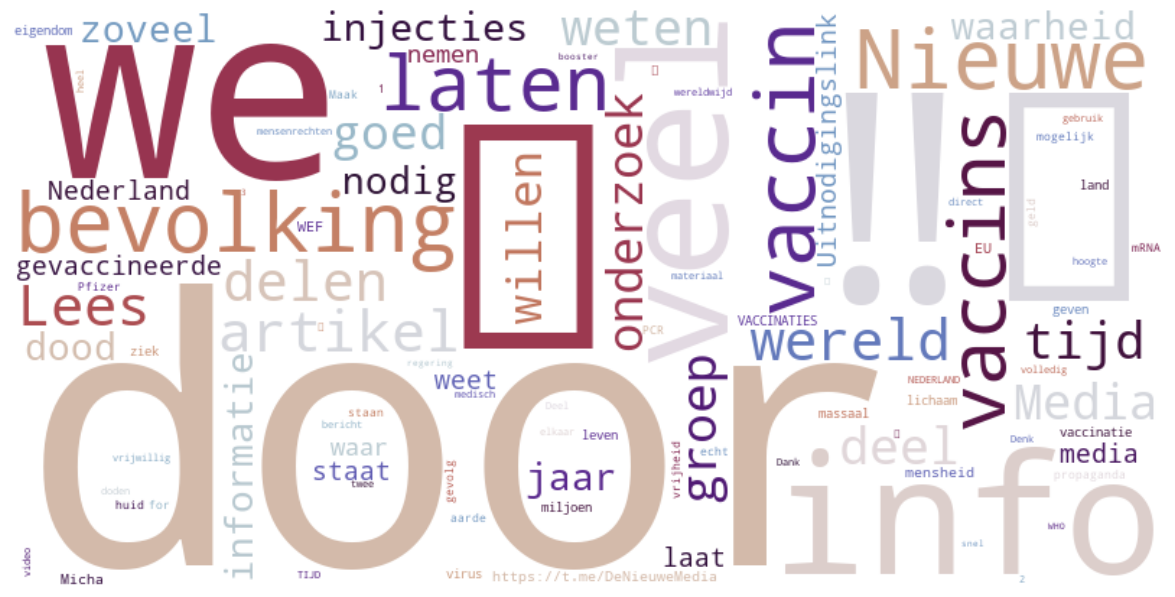

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 119/119 [00:00<00:00, 26938.80it/s]

current term = overheid


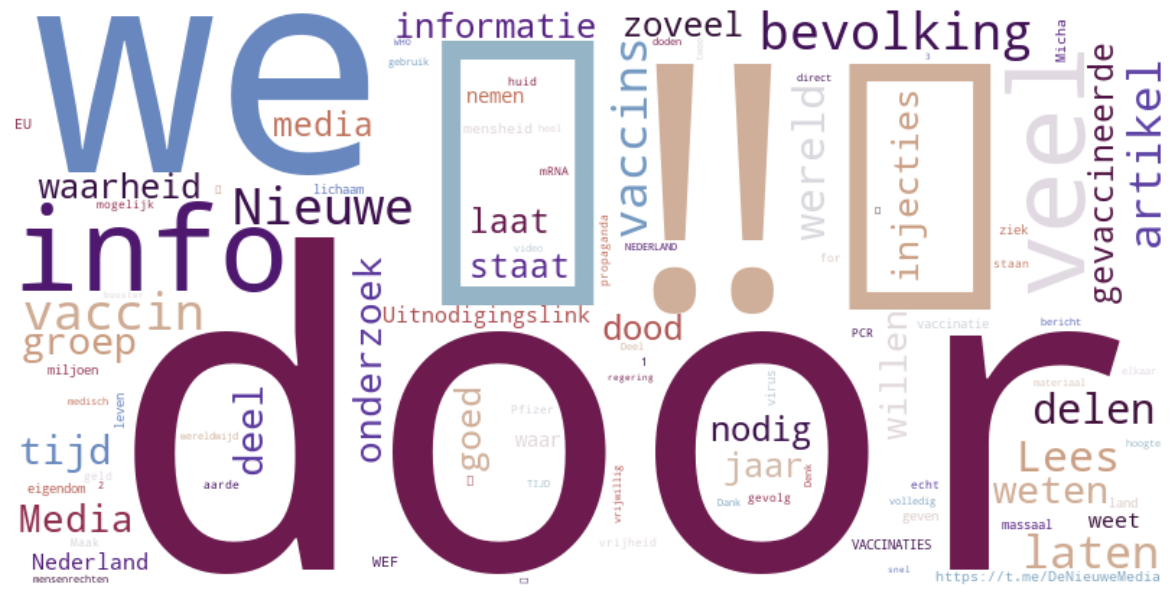

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|██████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 22677.24it/s]

current term = NAVO


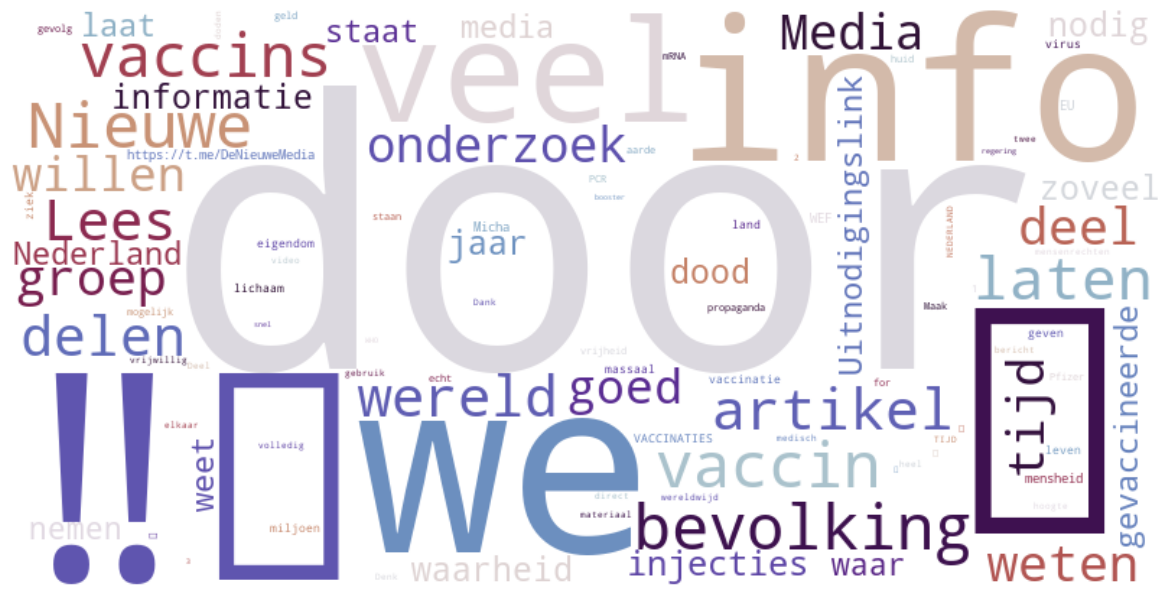

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|███████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

current term = ukraine


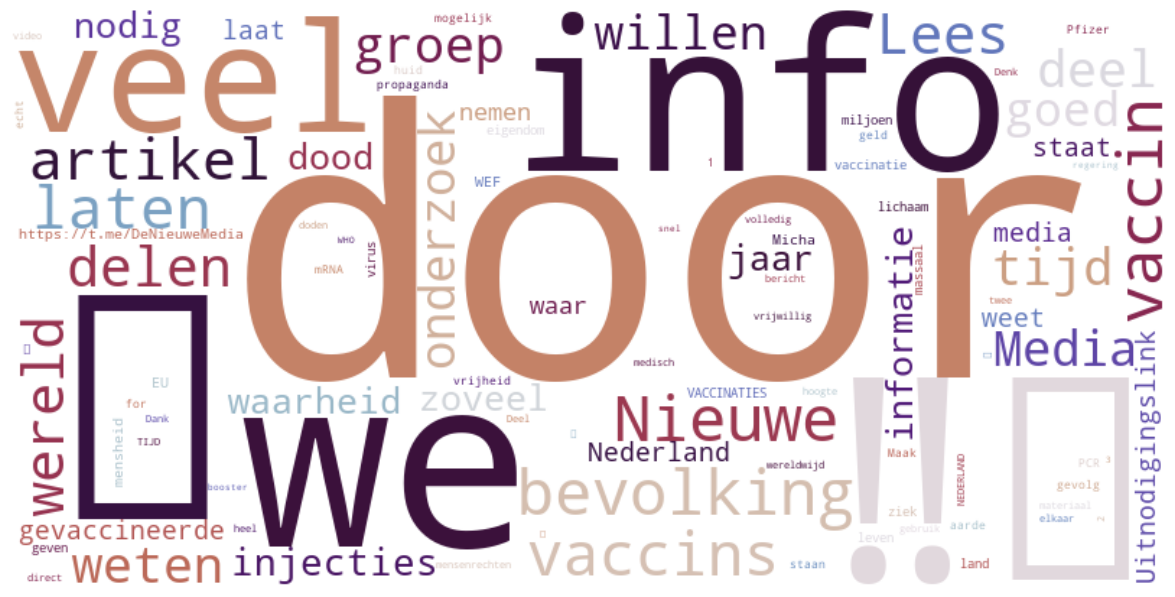

Total combined collocation counts:


C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


current file = talktomem
counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 432/432 [00:00<00:00, 25860.10it/s]

current term = vaccin


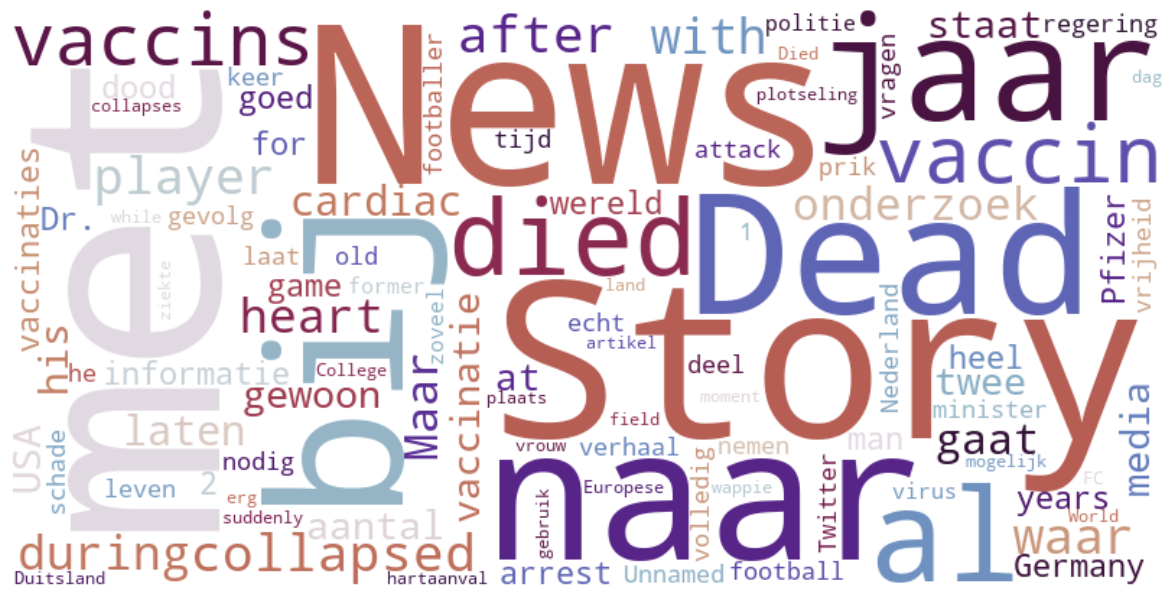

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 191/191 [00:00<00:00, 23189.72it/s]

current term = overheid


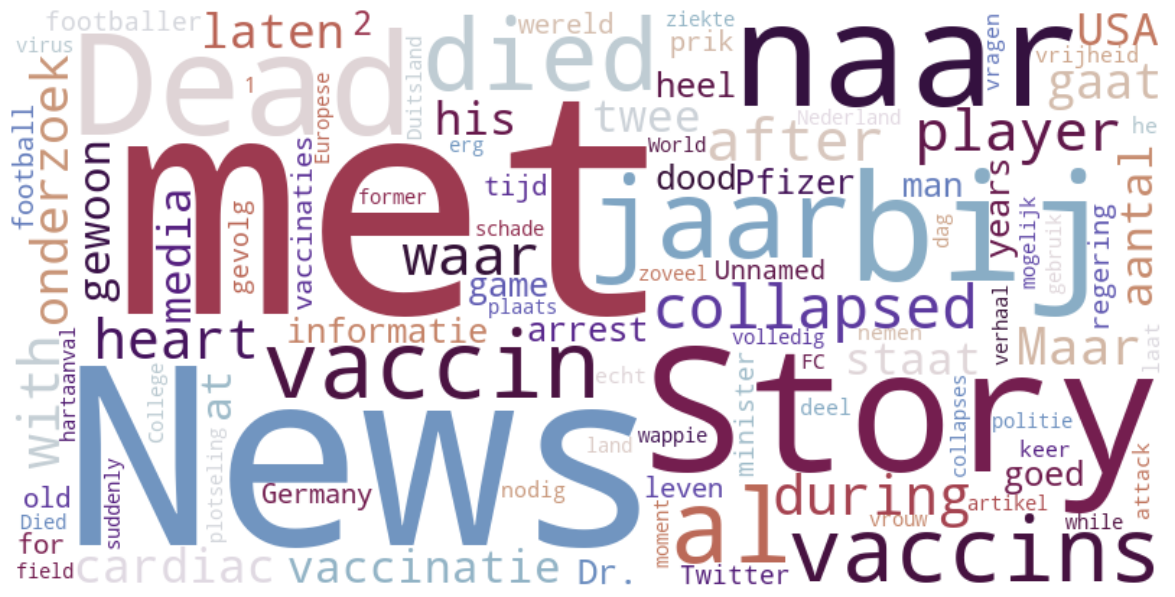

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|██████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 23209.84it/s]

current term = NAVO


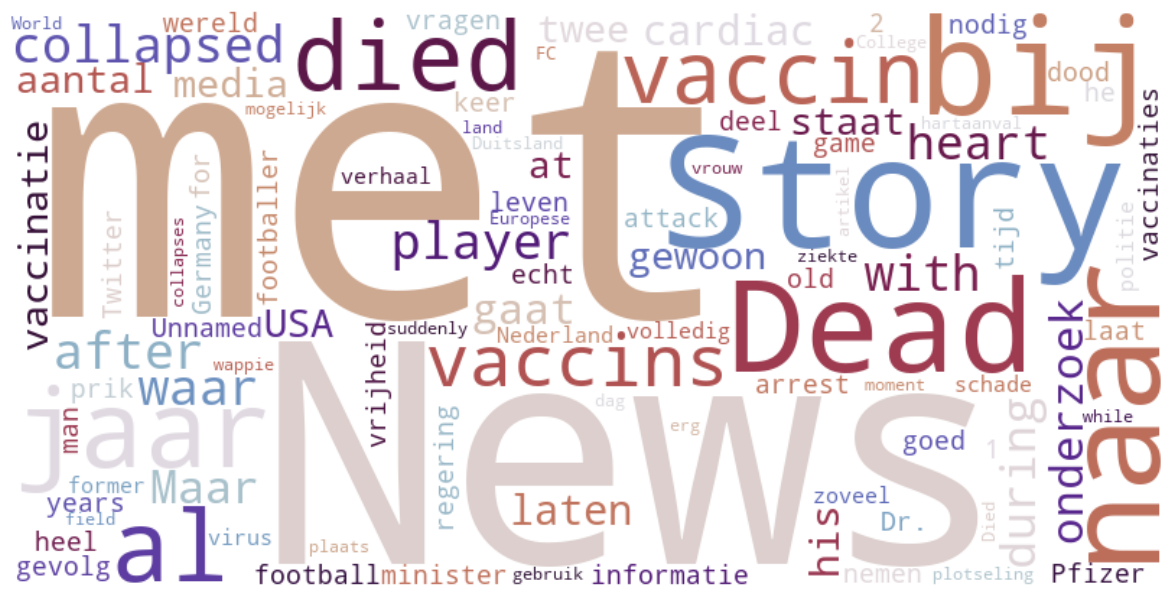

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]

current term = ukraine


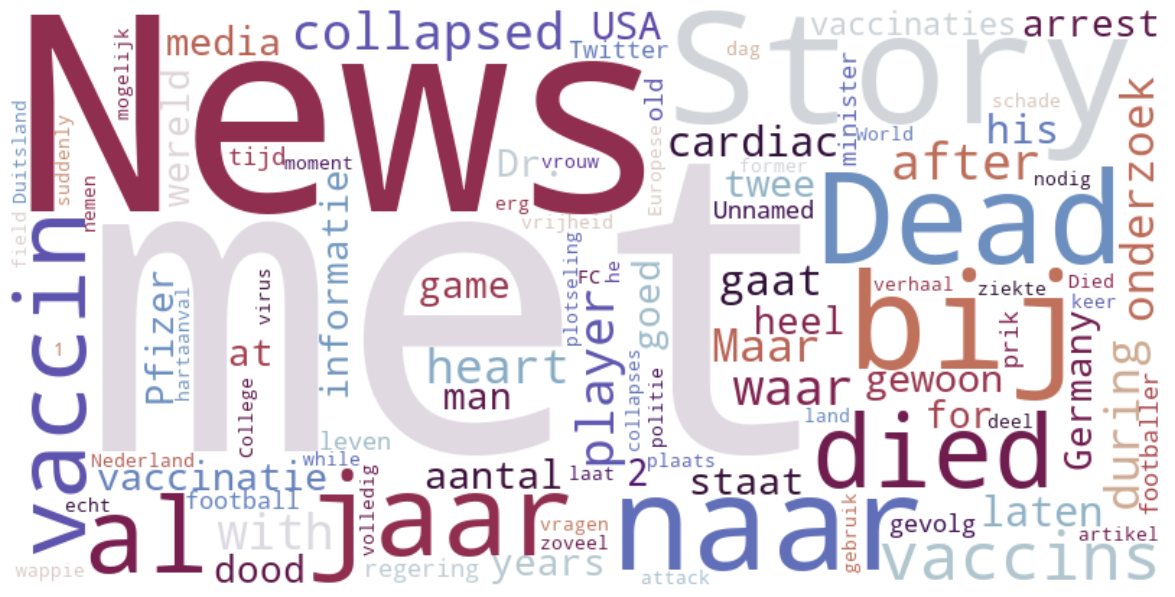

Total combined collocation counts:


C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


current file = vmGeluid
counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 839/839 [00:00<00:00, 51713.05it/s]

current term = vaccin


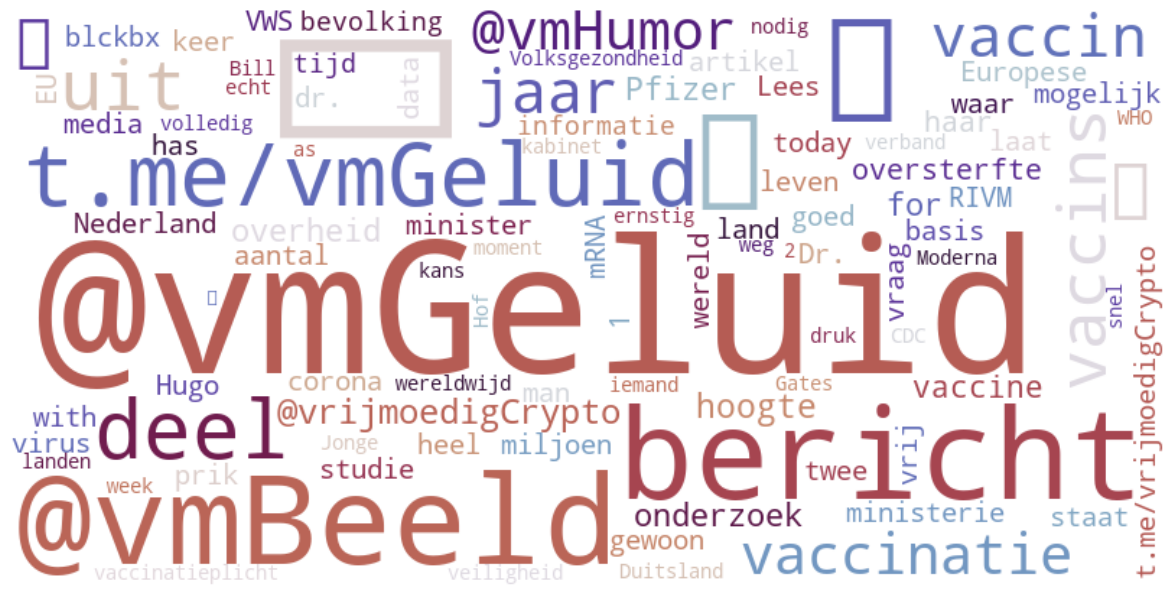

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 527/527 [00:00<00:00, 45450.58it/s]

current term = overheid


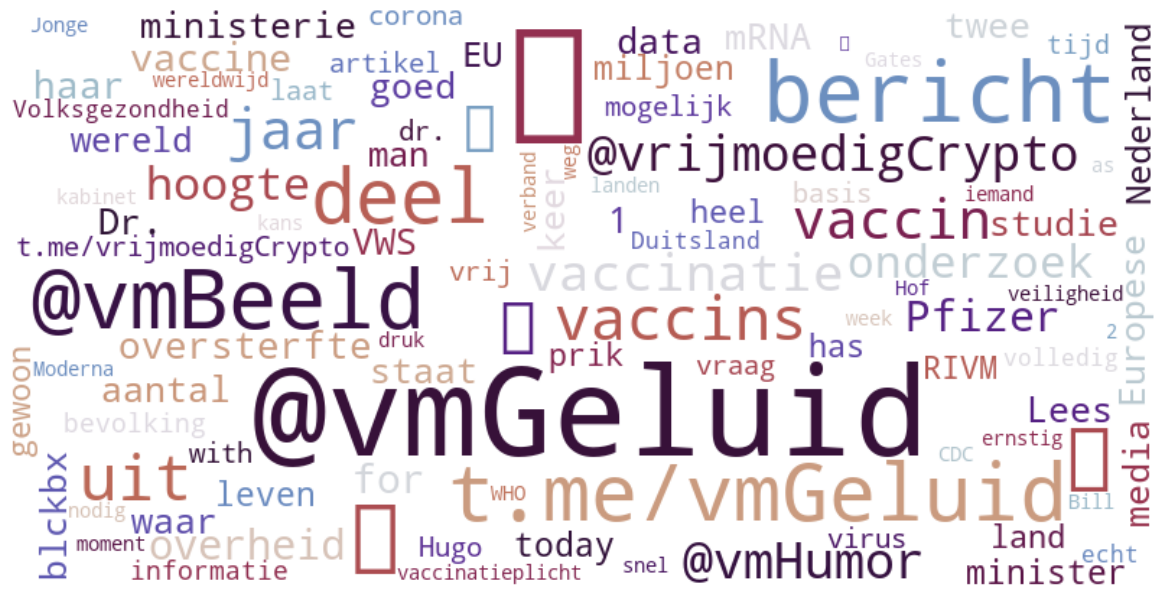

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 35507.34it/s]

current term = NAVO


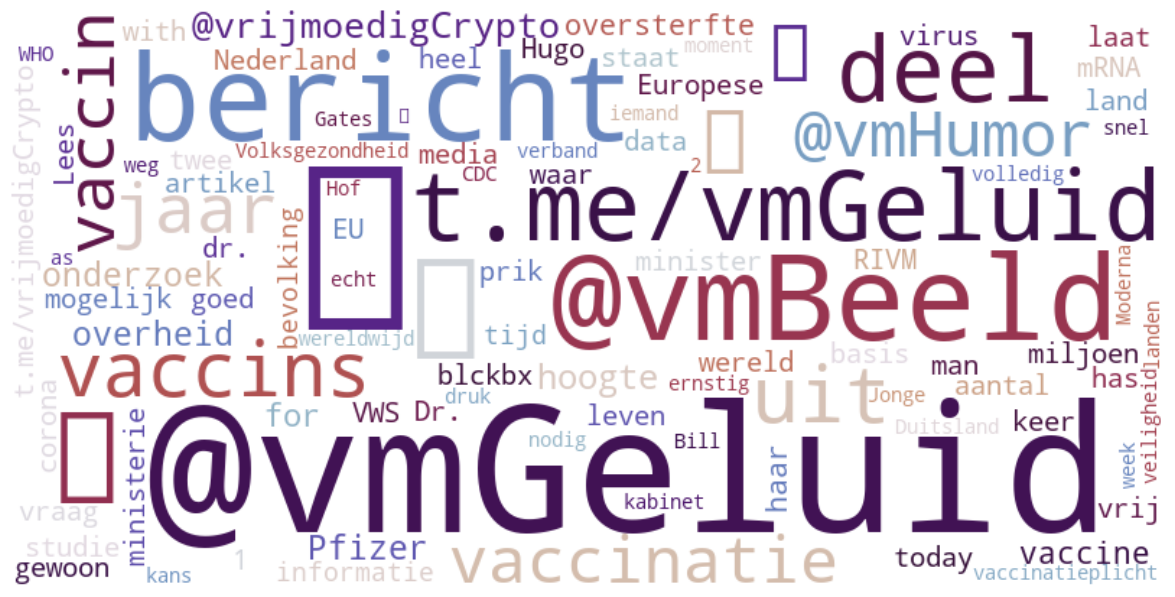

C:\Users\Gebruiken\AppData\Local\Temp\ipykernel_21232\3560339224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['message_text'].apply(count_words)


counting words
summing up


Summing word counts: 100%|█████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]

current term = ukraine


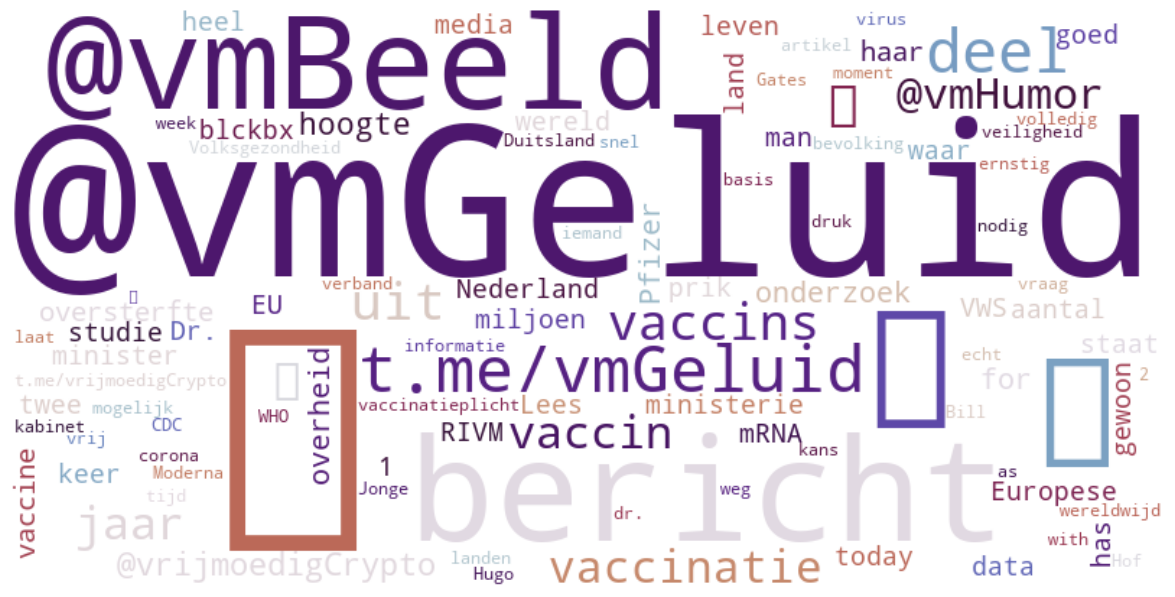

Total combined collocation counts:


In [15]:
#loop iteration over channel list, applying all three functions
for file in covid:
    pqt_file_dir = os.path.join(pqt_dirs, file + '.pqt')
    pqt_file = pd.read_parquet(pqt_file_dir)
    pqt_file.message_text = pqt_file.message_text.astype(str)

    name_base = file.removesuffix('.pqt')
    fdist_name = 'frequency_distribution_' + name_base + '.xlsx'
    fdist_file_dir = os.path.join(fdist_dirs, fdist_name)
    fdist_file = pd.read_excel(fdist_file_dir, engine='openpyxl')
    DET_LIST = fdist_file[fdist_file['label'].isin(['NOUN','PROPN', 'ADJ'])]['word'].unique()
    #print(DET_LIST) prints unique word counts
    print(f'current file = {file}')

    
    colloc_df = colloc(pqt_file.copy(), ukraine_terms)
